# Tratar con valores atípicos.

*A veces, los valores atípicos pueden estropear un análisis; Por lo general, no desea que un puñado de puntos de datos sesguen los resultados generales. Volvamos a nuestro ejemplo de datos de ingresos, con Donald Trump lanzado:*

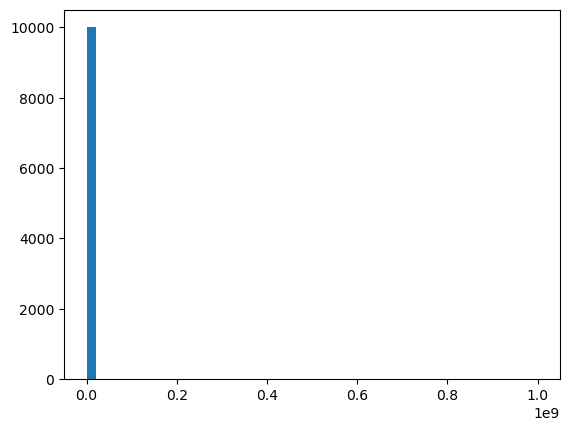

In [1]:
%matplotlib inline
import numpy as np

incomes = np.random.normal(27000, 15000, 10000) # ingresos de 27000, con una desv de 15000 y 10000 muestras
incomes = np.append(incomes, [1000000000]) # se agrega una cifra con valor atipico

import matplotlib.pyplot as plt
plt.hist(incomes, 50)
plt.show()

*Eso no es muy útil de ver. Un multimillonario terminó apretando a todos los demás en una sola línea en mi histograma. Además, sesgó significativamente mi ingreso medio:*

In [2]:
incomes.mean()

126924.5676767941

**Es importante profundizar en lo que está causando sus valores atípicos y comprender de dónde vienen. También debe pensar si eliminarlos es algo válido, dado el espíritu de lo que está tratando de analizar. Si sé que quiero entender más sobre los ingresos de los "estadounidenses típicos", filtrar a los multimillonarios parece algo legítimo. Aquí hay algo un poco más robusto que filtrar multimillonarios: filtra cualquier cosa más allá de dos desviaciones estándar del valor medio en el conjunto de datos:**

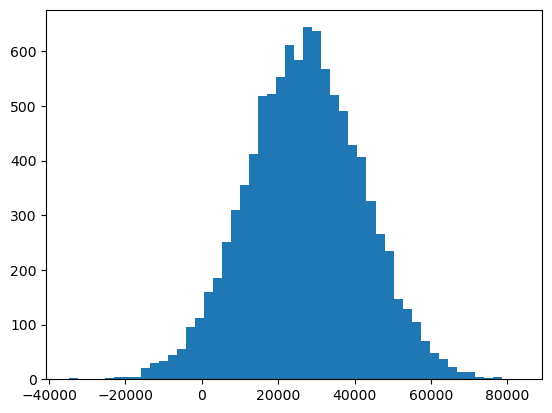

In [3]:
def reject_outliers(data):
    u = np.median(data)
    s = np.std(data)
    filtered = [e for e in data if (u - 2 * s < e < u + 2 * s)]
    return filtered

filtered = reject_outliers(incomes)

plt.hist(filtered, 50)
plt.show()

*Eso se ve mejor. Y, nuestra media es más, bueno, mezquina ahora también:*

In [6]:
np.mean(filtered)

26937.260133561776